In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils_benchmark import (
    PlotData,
    plot_std
)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
current_working_directory = os.getcwd()

In [15]:
cases = [(4,2),(4,3),(5,4),(5,3),(6,4),(6,5),(7,6)]
str_extra_mio = 'no'
d = 2

N4k2:


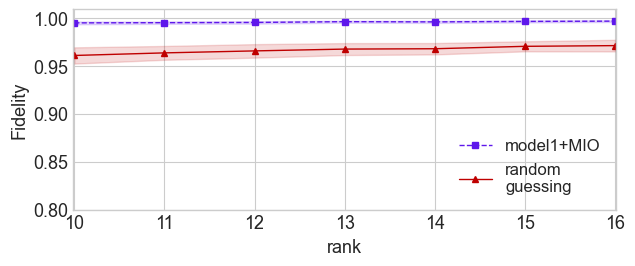

N4k3:


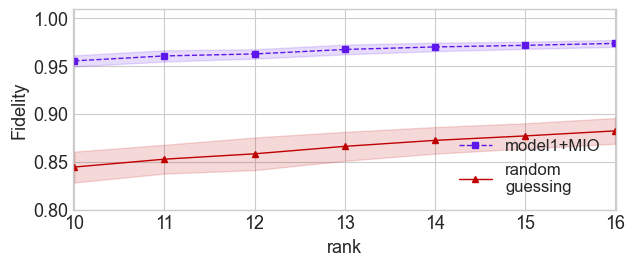

N5k4:


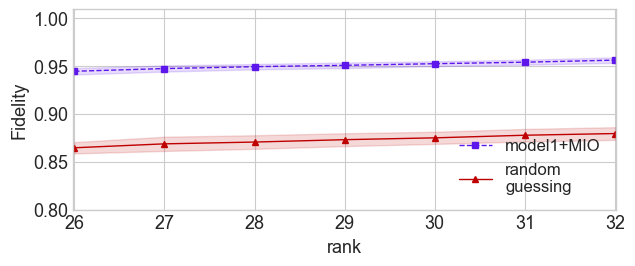

N5k3:


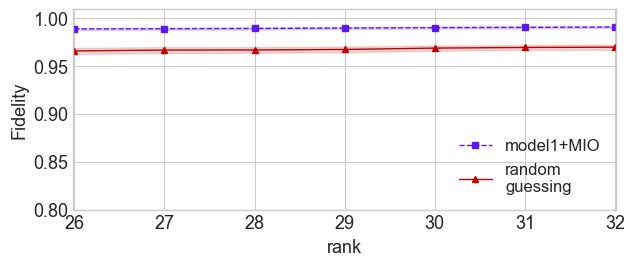

N6k4:


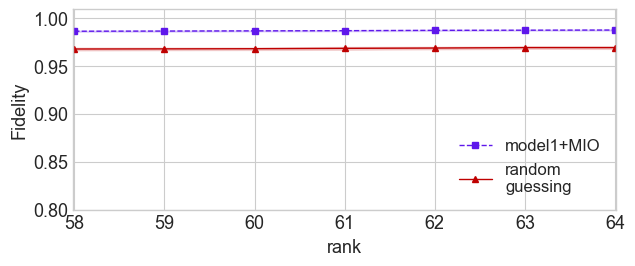

N6k5:


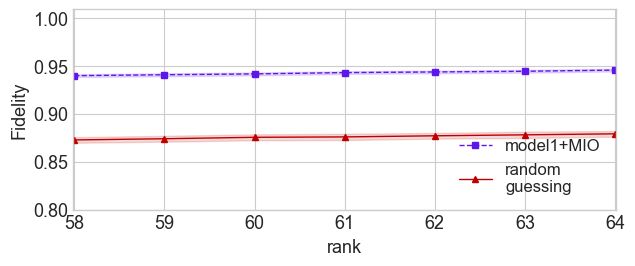

N7k6:


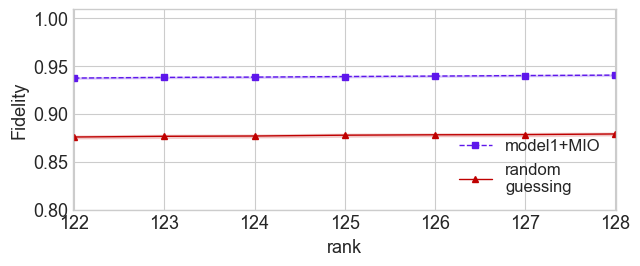

In [17]:
for N,k in cases:

    print(f'N{N}k{k}:')

    dn = d**N
    min_rank = dn - 6

    model_df = pd.read_csv(f"{current_working_directory}/fidelity_data/N{N}k{k}v0_extra_mio_{str_extra_mio}", 
                usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0).astype(float)
    model_df.columns = [rank for rank in range(min_rank,dn+1)]

    rg_df = pd.read_csv(f"{current_working_directory}/fidelity_data/rgN{N}k{k}v0_extra_mio_{str_extra_mio}", 
                usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0).astype(float)
    rg_df.columns = [rank for rank in range(min_rank,dn+1)]
    
    data_to_plot_model = PlotData(model_df,
                                   'model1+MIO',
                                   '#5e17eb',
                                   marker='s',
                                   linestyle='--')
    
    data_to_plot_rg = PlotData(rg_df,
                               'random\nguessing',
                               '#bf0000',
                               marker='^',
                               linestyle='-')

    path = f'{current_working_directory}/plots/stdN{N}k{k}_extra_mio_{str_extra_mio}.png'
    
    plot_std([data_to_plot_model,data_to_plot_rg], 
                    ylims=[0.80,1.009],
                    xlims=[dn-6-1e-2,dn + 1e-2], 
                    pathplot='',
                    legen_loc='lower right',
                    xlabel='rank')

### Plot succes rate

In [13]:
num_of_qudits = 6
k_marginals = 5

path = f"{current_working_directory}/fidelity_data/success_rate_N{num_of_qudits}k{k_marginals}v0_extra_mio_{str_extra_mio}"
success_rate = pd.read_csv(path).dropna(axis=1)

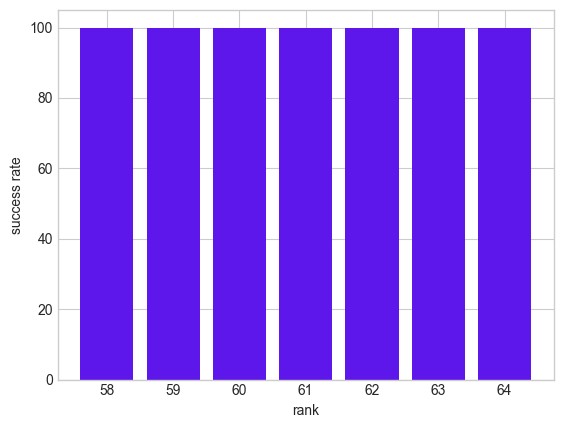

In [18]:
plt.bar(success_rate['Unnamed: 0'], success_rate['model'], color='#5e17eb', label='model1')
plt.xlabel('rank')
plt.ylabel('success rate')
plt.show()